# Ejercicio 3

Ahora vamos a crear una matriz donde vamos a concatenar el resultado de la transformación de cada una de las imágenes. Para ello, antes de empezar el bucle genera una matriz vacía de tamaño [n_imágenes, n_filas, n_columnas, n_canales], esto es, [15,1000,1500,3] (PISTA: La función zeros de numpy te ayudara). En cada iteración del blucle (i), almacena la imagen resultante en la posición correspondiente de la matriz que hemos creado [i, :, :, :].

Para comprobar que se está almacenando la imagen correctamente, en cada iteración, muestra cada imagen resultante por pantalla.

In [1]:
import os

import PIL
from PIL import Image, ImageEnhance
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def process_image(filepath):
    image = Image.open(filepath)
    img = np.array(image)

    img = resize_image(img)  # Redimensionar imagen

    img = np.fliplr(img)  # Giro izquierda - derecha

    img = rotate_image(img, 45)  # Rotar imagen

    img = zoom_in(img, 1.4)

    img = traslation_border(img, 0.3, -0.3)

    return img

In [3]:
def resize_image(img):
    new_rows = 1_000
    new_cols = 1_500

    return cv2.resize(img, (new_cols, new_rows), interpolation=cv2.INTER_CUBIC)

In [4]:
def rotate_image(image, angle, fill_color=(0, 0, 0)):
    height, width = image.shape[:2]

    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), borderValue=fill_color)

    return rotated_image

In [5]:
def zoom_in(image, factor):
    # Calculamos el nuevo tamaño de la imagen
    new_width = int(image.shape[1] * factor)
    new_height = int(image.shape[0] * factor)

    # Redimensionamos la imagen al tamaño nuevo
    zoomed_in_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

    # Hacemos el zoom con respecto al centro de la imagen
    center_rows = int(zoomed_in_image.shape[0] / 2)
    center_cols = int(zoomed_in_image.shape[1] / 2)

    # Recortamos la imagen al tamaño original alrededor del centro
    start_rows = center_rows - int(image.shape[0] / 2)
    end_rows = start_rows + image.shape[0]

    start_cols = center_cols - int(image.shape[1] / 2)
    end_cols = start_cols + image.shape[1]

    zoomed_in_image = zoomed_in_image[start_rows:end_rows, start_cols:end_cols]

    return zoomed_in_image

In [6]:
def traslation_border(image, rows_factor, cols_factor, border_mode=cv2.BORDER_REFLECT):
    # Calculamos el número de filas y columnas que se va a desplazar la imagen
    rows_to_move = int(image.shape[0] * rows_factor)
    cols_to_move = int(image.shape[1] * cols_factor)

    # Calculamos matriz de traslación
    T = np.float32([[1, 0, -cols_to_move], [0, 1, rows_to_move]])
    img_traslated = cv2.warpAffine(image, T, (image.shape[1], image.shape[0]), borderMode=border_mode)

    return img_traslated

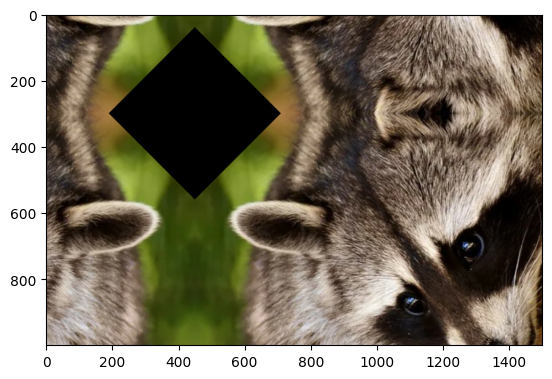

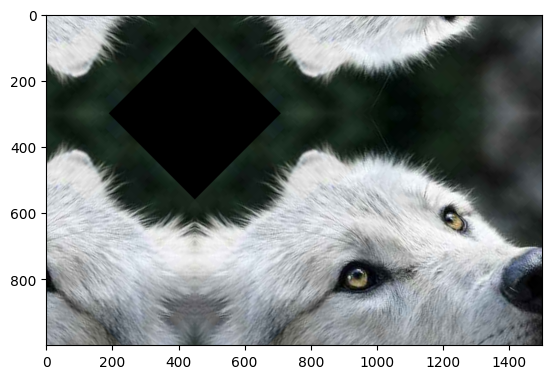

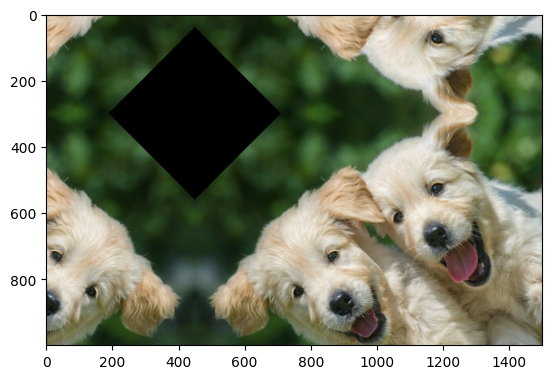

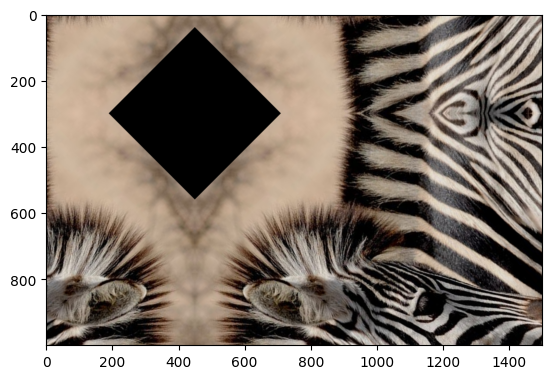

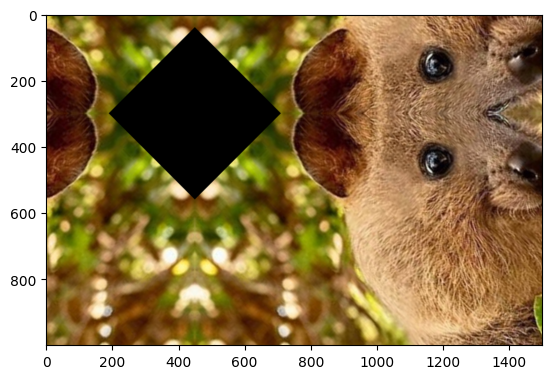

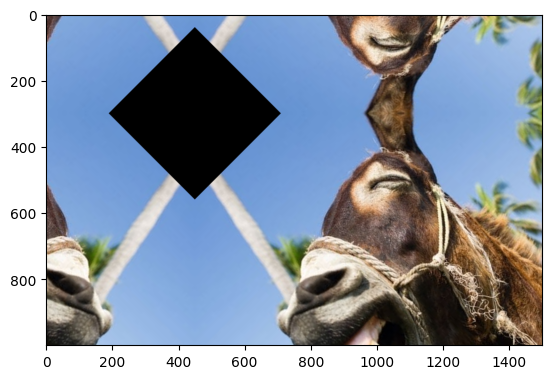

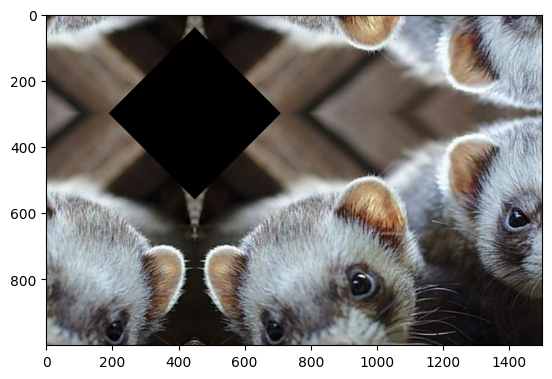

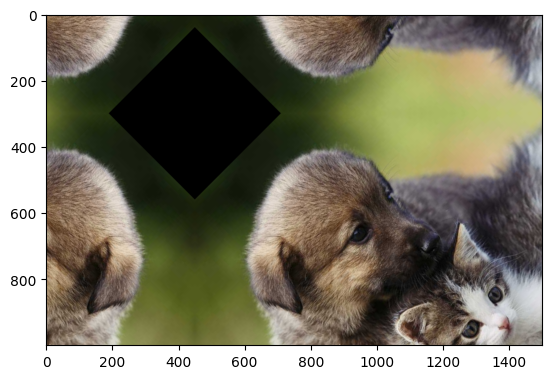

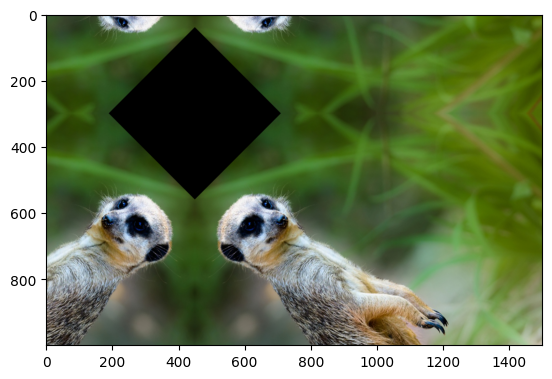

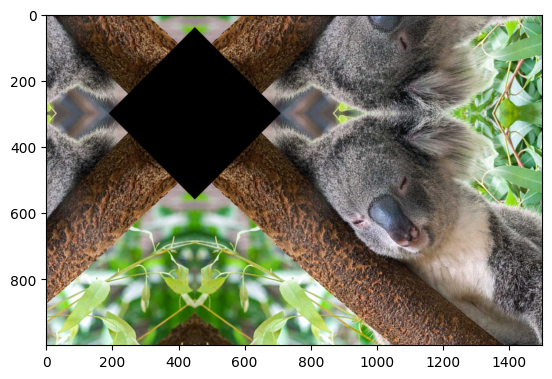

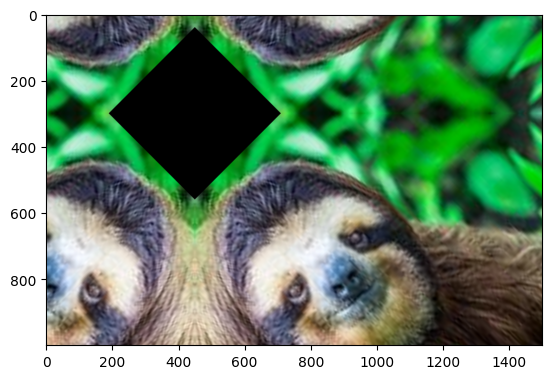

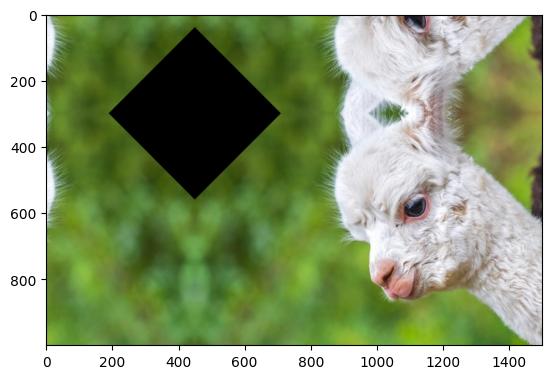

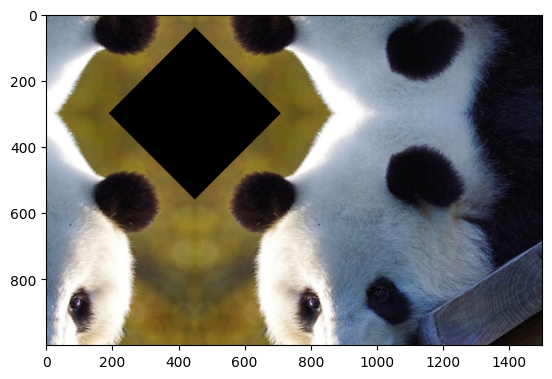

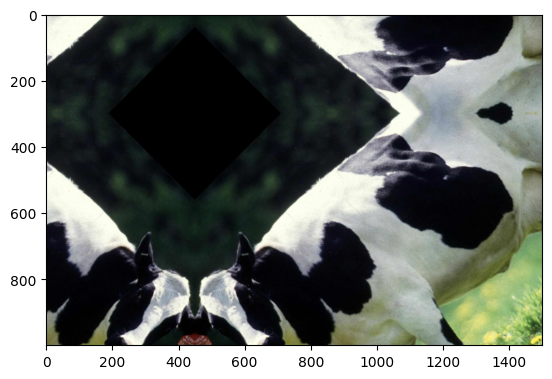

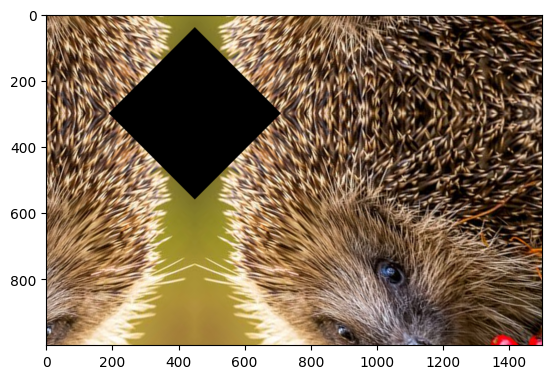

In [8]:
img_matrix = np.zeros((15, 1_000, 1_500, 3), dtype=np.uint8)

images = os.listdir('./imagenes/practica')
images_absolute_path = [os.path.join(os.getcwd(), 'imagenes', 'practica', file) for file in images]

for idx, img in enumerate(images_absolute_path):
    img_matrix[idx] = process_image(img)

for image in img_matrix:
    plt.imshow(image)
    plt.show()